<a href="https://www.kaggle.com/code/mdsahadathossentanim/heart-failure-prediction?scriptVersionId=209827920" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import matplotlib.pyplot as plt 

In [3]:
dataset = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [4]:
print(X)

[[40 'M' 'ATA' ... 'N' 0.0 'Up']
 [49 'F' 'NAP' ... 'N' 1.0 'Flat']
 [37 'M' 'ATA' ... 'N' 0.0 'Up']
 ...
 [57 'M' 'ASY' ... 'Y' 1.2 'Flat']
 [57 'F' 'ATA' ... 'N' 0.0 'Flat']
 [38 'M' 'NAP' ... 'N' 0.0 'Up']]


In [5]:
print(Y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

# Data Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le6 = LabelEncoder()
le8 = LabelEncoder()
le10 = LabelEncoder()
X[:,1] = le1.fit_transform(X[:,1])
X[:,2] = le2.fit_transform(X[:,2])
X[:,6] = le6.fit_transform(X[:,6])
X[:,8] = le8.fit_transform(X[:,8])
X[:,10] = le10.fit_transform(X[:,10])

In [7]:
print(X)

[[40 1 1 ... 0 0.0 2]
 [49 0 2 ... 0 1.0 1]
 [37 1 1 ... 0 0.0 2]
 ...
 [57 1 0 ... 1 1.2 1]
 [57 0 1 ... 0 0.0 1]
 [38 1 2 ... 0 0.0 2]]


# Splitting Dataset into Training and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
print(X_train)

[[70 1 0 ... 1 2.0 1]
 [46 1 0 ... 1 1.5 1]
 [65 0 2 ... 0 0.8 2]
 ...
 [57 0 0 ... 0 0.0 2]
 [64 1 0 ... 1 4.0 0]
 [47 1 2 ... 0 0.0 2]]


In [10]:
print(X_test)

[[55 1 0 ... 0 0.1 1]
 [66 1 0 ... 0 0.4 1]
 [51 1 0 ... 0 0.0 1]
 ...
 [52 1 0 ... 0 0.0 2]
 [37 1 1 ... 0 0.0 2]
 [53 1 2 ... 1 0.0 1]]


In [11]:
print(Y_train)

[1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1
 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1
 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0
 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 0 1 

In [12]:
print(Y_test)

[1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1]


# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
print(X_train)

[[ 1.75354017  0.51740017 -0.82686398 ...  1.19939076  1.0553738
  -0.59357258]
 [-0.81787111  0.51740017 -0.82686398 ...  1.19939076  0.57784676
  -0.59357258]
 [ 1.21782949 -1.93273999  1.27683849 ... -0.83375663 -0.0906911
   1.0443307 ]
 ...
 [ 0.3606924  -1.93273999 -0.82686398 ... -0.83375663 -0.85473437
   1.0443307 ]
 [ 1.11068735  0.51740017 -0.82686398 ...  1.19939076  2.96548197
  -2.23147586]
 [-0.71072897  0.51740017  1.27683849 ... -0.83375663 -0.85473437
   1.0443307 ]]


# Training Dataset

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [16]:
#SVM
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,Y_train)

SVC()

In [17]:
y_pred_logistic = model_logistic.predict(X_test)
y_pred_svm = model_svm.predict(X_test)

# Testing Accuracy

In [18]:
from sklearn.metrics import accuracy_score
Logistic_Acc = accuracy_score(Y_test,y_pred_logistic)
Svm_Acc = accuracy_score(Y_test,y_pred_svm)

In [19]:
print("Logistic =",Logistic_Acc)
print("SVM =",Svm_Acc)

Logistic = 0.8369565217391305
SVM = 0.8641304347826086


# Plotting Accuracy of different ML Algorithm

Text(0, 0.5, 'Accuracy')

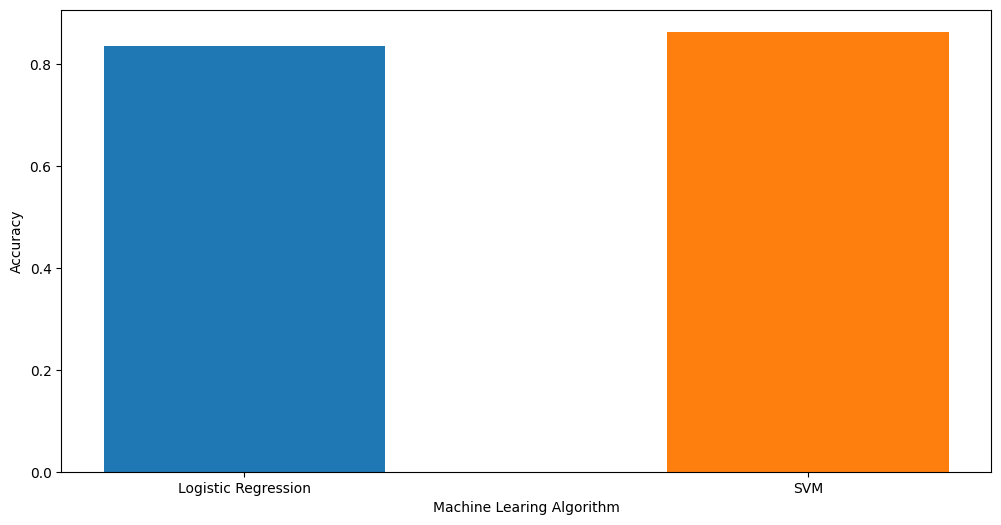

In [20]:
plt.figure(figsize=(12,6))
plt.bar("Logistic Regression", Logistic_Acc,width=0.5)
plt.bar("SVM",Svm_Acc,width=0.5)
plt.xlabel("Machine Learing Algorithm")
plt.ylabel("Accuracy")

# Single Prediction

# Age=50,sex=0(F),chestpain=0(ASY),RestingBP=105,
# cholestrol=250,FastingBS=1,RestingECG=2(ST),
# MaxHR=175,ExerciseAngina=1(y),oldPeak=1.9,st_slop=0(down)


In [21]:
result = model_svm.predict(sc.transform([[20,0,1,140,290,0,0,165,1,1,1]]))
if result == [0]:
    print("Not Having Heart Disease")
else:
    print("Having Heart Disease")

Not Having Heart Disease
